In [ ]:
import numpy as np
import librosa
import os
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:

# Parameters
K = 8  # Number of clusters

# Step 1: Extract fetures
def extract_features(file_path):
    y, sr = librosa.load(file_path, sr=None)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)  # 13 MFCCs
    return np.mean(mfccs.T, axis=0)  # Take mean to reduce dimensionality



In [ ]:
def load_features(directory_path):
    features = []
    file_paths = []
    for file_name in os.listdir(directory_path):
        file_path = os.path.join(directory_path, file_name)
        features.append(extract_features(file_path))
        file_paths.append(file_name)
    return np.array(features), file_paths

In [ ]:
# load the data from google drive
from google.colab import drive
drive.mount('/content/drive')

data_path = '/content/drive/MyDrive/songs/files'



Mounted at /content/drive


In [ ]:
features, file_paths = load_features(data_path)

In [ ]:

df = pd.DataFrame({'file_path': file_paths, 'feature': list(features)})

# Save the DataFrame to a CSV file
df.to_csv('/content/drive/MyDrive/songs/features.csv', index=False)

In [ ]:
# load features from google drive
import ast

df = pd.read_csv('/content/drive/MyDrive/songs/features.csv')
# Convert the string representation of lists to actual lists using ast.literal_eval

# apply this code for all features
df['feature'] = df['feature'].apply(lambda x: np.fromstring(x.strip('[]'), sep=' '))
file_paths = df['file_path'].tolist()

In [ ]:

features = np.array(df['feature'].tolist())
features

array([[-237.30972   ,  155.75966   ,   -0.63729125, ...,  -11.601371  ,
          -1.467377  ,    0.32246616],
       [-188.02957   ,  160.07114   ,    4.953541  , ...,  -15.8221245 ,
          -0.35442978,   -3.1591926 ],
       [-118.84097   ,  126.54644   ,   12.277719  , ...,   -4.045137  ,
           6.6406503 ,    8.628023  ],
       ...,
       [-108.89484   ,  147.49968   ,  -26.263798  , ...,   -3.656493  ,
          -1.0709244 ,    1.0608891 ],
       [-192.8757    ,  127.17708   ,   -9.426522  , ...,   -8.682986  ,
          -1.7749288 ,   -3.591371  ],
       [-229.06648   ,  148.51648   ,   10.641583  , ...,   -9.23194   ,
          -8.307368  ,   -2.0566113 ]])

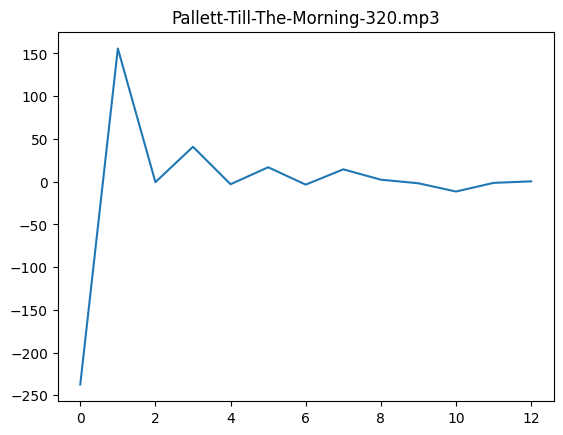

In [ ]:
plt.plot(features[0])
plt.title(file_paths[0])
plt.show()

In [ ]:
# Standardize the data
scaler = StandardScaler()
features = scaler.fit_transform(features)

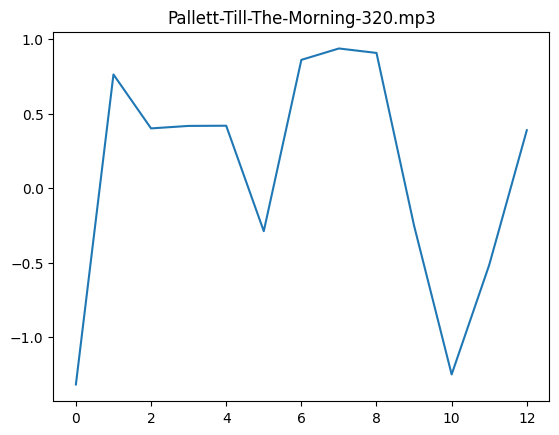

In [ ]:
plt.plot(features[0])
plt.title(file_paths[0])
plt.show()

In [ ]:
n_components = 10  # Number of PCA components

# Step 3: Apply PCA for Dimensionality Reduction
pca = PCA(n_components=n_components)
features_pca = pca.fit_transform(features)
print(f"Explained Variance Ratio for PCA components: {pca.explained_variance_ratio_}")

Explained Variance Ratio for PCA components: [0.32608922 0.17736935 0.10081778 0.0722395  0.06196569 0.05740871
 0.04372907 0.03874756 0.03397526 0.03049908]


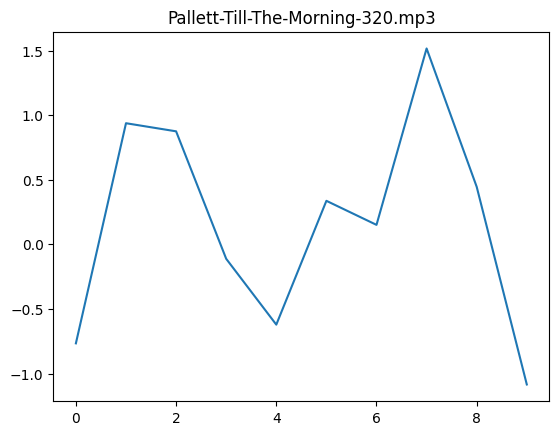

In [ ]:
plt.plot(features_pca[0])
plt.title(file_paths[0])
plt.show()

In [ ]:
# Step 3: K-Means Clustering
kmeans = KMeans(n_clusters=K, random_state=0)
kmeans_labels = kmeans.fit_predict(features_pca)

In [ ]:
# Step 4: Gaussian Mixture Model Clustering
gmm = GaussianMixture(n_components=K, random_state=0)
gmm_labels = gmm.fit_predict(features_pca)

In [ ]:
print("K-Means Clustering Results:")
for label in range(K):
    print(f"\nCluster {label}:")
    cluster_files = [file_paths[i] for i in range(len(file_paths)) if kmeans_labels[i] == label]
    for file in cluster_files:
        print(f" - {file}")

In [ ]:
print("\nGaussian Mixture Model Clustering Results:")
for label in range(K):
    print(f"\nCluster {label}:")
    cluster_files = [file_paths[i] for i in range(len(file_paths)) if gmm_labels[i] == label]
    for file in cluster_files:
        print(f" - {file}")

In [ ]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Evaluate K-Means model
print("K-Means Model Evaluation:")
kmeans_silhouette = silhouette_score(features_pca, kmeans_labels)
kmeans_calinski_harabasz = calinski_harabasz_score(features_pca, kmeans_labels)
kmeans_davies_bouldin = davies_bouldin_score(features_pca, kmeans_labels)

print(f"Silhouette Score: {kmeans_silhouette:.3f}")
print(f"Calinski-Harabasz Index: {kmeans_calinski_harabasz:.3f}")
print(f"Davies-Bouldin Index: {kmeans_davies_bouldin:.3f}")

# Evaluate GMM model
print("\nGaussian Mixture Model Evaluation:")
gmm_silhouette = silhouette_score(features_pca, gmm_labels)
gmm_calinski_harabasz = calinski_harabasz_score(features_pca, gmm_labels)
gmm_davies_bouldin = davies_bouldin_score(features_pca, gmm_labels)

print(f"Silhouette Score: {gmm_silhouette:.3f}")
print(f"Calinski-Harabasz Index: {gmm_calinski_harabasz:.3f}")
print(f"Davies-Bouldin Index: {gmm_davies_bouldin:.3f}")


K-Means Model Evaluation:
Silhouette Score: 0.101
Calinski-Harabasz Index: 69.239
Davies-Bouldin Index: 1.955

Gaussian Mixture Model Evaluation:
Silhouette Score: 0.018
Calinski-Harabasz Index: 41.361
Davies-Bouldin Index: 2.651


In [ ]:

# Assuming you have your kmeans_labels and file_paths defined

# Create a DataFrame with file names and their corresponding cluster labels
cluster_df = pd.DataFrame({'File Name': file_paths, 'Cluster Label': kmeans_labels})

# Save the DataFrame to a CSV file
cluster_df.to_csv('/content/drive/MyDrive/songs/clusters.csv', index=False)

print("Clusters saved to clusters.csv")

Clusters saved to clusters.csv


In [ ]:
cluster_df.head()

,File Name,Cluster Label
0,Pallett-Till-The-Morning-320.mp3,5
1,Pallett – Dream Away With Me.mp3,0
2,@REMIXERAP☚میکس رپی Baroon.mp3,6
3,1|14_Fascinating_Flower_Hadi_Pakzad_Masoud_Fay...,1
4,آنِ دِگرانی_T'others'.mp3,0


In [12]:
cluster_df = pd.read_csv('/content/drive/MyDrive/songs/clusters.csv')

cluster_df.head()

,File Name,Cluster Label
0,Pallett-Till-The-Morning-320.mp3,5
1,Pallett – Dream Away With Me.mp3,0
2,@REMIXERAP☚میکس رپی Baroon.mp3,6
3,1|14_Fascinating_Flower_Hadi_Pakzad_Masoud_Fay...,1
4,آنِ دِگرانی_T'others'.mp3,0


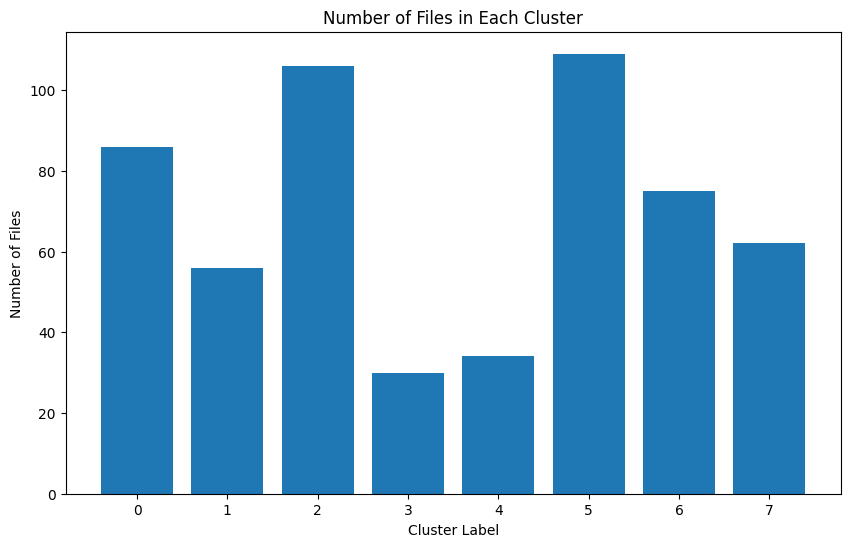

In [13]:


# Count the number of files in each cluster
cluster_counts = cluster_df.groupby('Cluster Label')['File Name'].count()

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(cluster_counts.index, cluster_counts.values)
plt.xlabel('Cluster Label')
plt.ylabel('Number of Files')
plt.title('Number of Files in Each Cluster')
plt.show()